<a href="https://colab.research.google.com/github/Priya378/Internet-Analysis-Project/blob/main/Internet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pylint: disable=invalid-name, missing-module-docstring, wrong-import-position, import-error

## **Making necessary installation and imports**

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install IPython

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as d

In [ ]:
datadf=pd.read_csv('https://raw.githubusercontent.com/\
Priya378/Internet-Analysis-Project/main/data.csv')
datadf.rename(columns={"Unnamed: 0":"Time"},inplace=True)
d.display(datadf)

,Time,Server,Latency,Jitter,Download,Upload,Packet Loss
0,Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
1,Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
2,Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
3,Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
4,Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4864,Tue Jun 29 13:12:02,Shyam Spectra - Chennai,53.80,16.12,7.20,3.49,0.0
4865,Tue Jun 29 13:14:01,Airtel Broadband - Chennai,55.54,6.93,5.91,2.90,NaN
4866,Tue Jun 29 13:16:01,TATASky Broadband Pvt Ltd - Bangalore,73.10,44.00,1.46,2.64,0.0
4867,Tue Jun 29 13:18:01,ACT Fibernet - Bangalore,72.41,44.61,5.77,2.66,0.4


**Best Conditions**:
- `Latency: lower the better
- Jitter: lower the better
- Download: higher the better
- Upload: higher the better
- Packet Loss: 0.0%

**Dataframe has 4869 entries having data spanning a week.**

## **Outages and Server analysis**

When network outages happen, all the attributes like latency, jitter, download, upload, packet loss are null because of complete or partial failure of the internet services. In the below figure (obtained from statistics.log) we can see network outages from line 2576 onwards.

Only values corresponding to all the attributes are stored in the csv file for the ease of analysis.

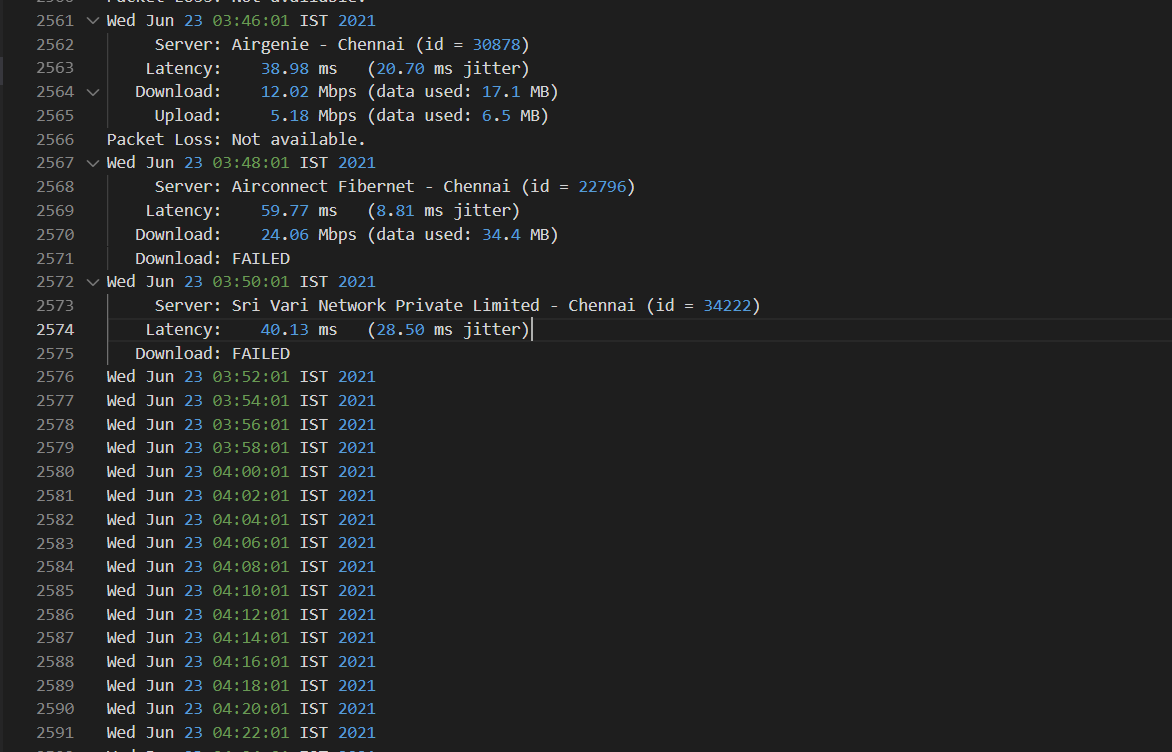

In [ ]:
outagedf=datadf.set_index("Time",inplace=False) # pylint: disable=no-member
d.display(outagedf)

,Server,Latency,Jitter,Download,Upload,Packet Loss
Time,,,,,,
Tue Jun 22 12:38:01,Airtel Broadband - Chennai,39.54,21.98,6.63,1.41,NaN
Tue Jun 22 12:40:01,Airgenie - Chennai,78.52,1.77,5.50,1.36,NaN
Tue Jun 22 12:42:01,Airtel Broadband - Chennai,71.26,9.71,5.39,1.70,NaN
Tue Jun 22 12:44:01,TataSky Broadband Private Limited - Chennai,41.48,20.52,3.24,1.05,0.0
Tue Jun 22 12:46:01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
Tue Jun 29 13:12:02,Shyam Spectra - Chennai,53.80,16.12,7.20,3.49,0.0
Tue Jun 29 13:14:01,Airtel Broadband - Chennai,55.54,6.93,5.91,2.90,NaN
Tue Jun 29 13:16:01,TATASky Broadband Pvt Ltd - Bangalore,73.10,44.00,1.46,2.64,0.0


**Iterating over the rows of the dataframe to**:

*   Find out the most connected server
*   Hour corresponding to maximum outages
*   Day corresponding to maximum outages

**If values in all the columns for a row are absent, we can say that network outage happened during that time.**



In [ ]:
day_outages={}
hour_outages={}
days=["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
hours=list(range(24))
columns=[]
for x in outagedf:
    columns.append(x)
columns.remove("Server")
servers={}

for i in days:
    day_outages[i]=0

for i in hours:
    hour_outages[str(i)+":00"]=0

for i in outagedf.index.values:
    F=0
    if isinstance(outagedf.loc[i]["Server"],str):
        servers[outagedf.loc[i]["Server"]]=servers.get(outagedf.loc[i]["Server"],0)+1
    for x in columns:
        if not np.isnan(outagedf.loc[i][x]):
            F=1
    if F==0:
        day_outages[i[:3]]+=1
        hour_outages[str(int(i[11:13]))+":00"]+=1

In [ ]:
hour_outagedf=pd.DataFrame({"Count":hour_outages}).sort_values(["Count"],ascending=0)
print("Number of outages in each hour:")
d.display(hour_outagedf)

In [ ]:
keys=hour_outages.keys()
values=hour_outages.values()
fig=plt.gcf()
fig.set_size_inches(20,5)
plt.bar(keys,values)
plt.xlabel("Hour",fontsize=15)
plt.ylabel("Count of outages",fontsize=15)
plt.title("Network Outages",pad='10',fontsize=20)
plt.show()

**Network outages happened maximum times at 8:00 IST. No outages were observed at 0:00 IST, 2:00 IST, 23:00 IST, 1:00 IST, 18:00 IST, 16:00 IST, 11:00 IST and 20 IST.**

In [ ]:
day_outagedf=pd.DataFrame({"Count of Days":day_outages}).sort_values(["Count of Days"],ascending=0)
print("Number of outages in each week day:")
d.display(day_outagedf)

In [ ]:
keys=day_outages.keys()
values=day_outages.values()
fig=plt.gcf()
fig.set_size_inches(12,5)
plt.bar(keys,values)
plt.xlabel("Days",fontsize=15)
plt.ylabel("Count of outages",fontsize=15)
plt.title("Network Outages",pad='10',fontsize=20)
plt.show()

**We can see that thursday had got least number of network outages and tuesday had got the most.**


In [ ]:
connections=pd.DataFrame({"Connections":servers})
connections=connections.sort_values(["Connections"], ascending =0)
print("Connections each server made:")
d.display(connections)

 **Most connected server is Airtel Broadband - Chennai**

##**Analysis of days and hours**

In [ ]:
df=datadf.copy()
df.insert (0,"Day",[row[:3] for row in df["Time"]])
df.insert (1,"Hour",[row[11:13]+":00" for row in df["Time"]])
d.display(df)

### **Analysis of days**

In [ ]:
daydf=df.groupby("Day").agg({
  "Latency":"mean",
  "Jitter":"mean",
  "Download":"mean",
  "Upload":"mean",
 "Packet Loss":"mean"}).round(2)

In [ ]:
d.display(daydf)

In [ ]:
daydf_analyse=pd.DataFrame({"Minimum on":daydf.idxmin(),"Maximum on":daydf.idxmax()})

In [ ]:
d.display(daydf_analyse)

 **Conclusions:**

---




*   **Thursday** was the **best** in terms of **average latency**
*   **Tuesday** was the **worst** in terms of **average latency**

*   **Tuesday** was the **best** in terms of **average jitter**
*   **Sunday** was the **worst** in terms of **average jitter**

*   **Thursday** was the **best** in terms of **average packet loss**
*   **Monday** was the **worst** in terms of **average packet loss**

*   **Sunday** was the **best** in terms of **average download speed**
*   **Saturday** was the **worst** in terms of **average download speed**

*   **Friday** was the **best** in terms of **average upload speed**
*   **Wednesday** was the **worst** in terms of **average upload speed**




### **Analysis of hours**

In [ ]:
hourdf=df.groupby("Hour").agg({
  "Latency":"mean",
  "Jitter":"mean",
  "Download":"mean",
  "Upload":"mean",
 "Packet Loss":"mean"}).round(2)

In [ ]:
d.display(hourdf)

In [ ]:
hourdf_analyse=pd.DataFrame({"Minimum at":hourdf.idxmin(),"Maximum at":hourdf.idxmax()})

In [ ]:
d.display(hourdf_analyse)

 **Conclusions:**

---




*   **01:00 IST** was the **best** in terms of **average latency**
*   **09:00 IST** was the **worst** in terms of **average latency**

*   **04:00 IST** was the **best** in terms of **average jitter**
*   **08:00 IST** was the **worst** in terms of **average jitter**

*   **06:00 IST** was the **best** in terms of **average packet loss**
*   **07:00 IST** was the **worst** in terms of **average packet loss**

*   **04:00 IST** was the **best** in terms of **average download speed**
*   **22:00 IST** was the **worst** in terms of **average download speed**

*   **02:00 IST** was the **best** in terms of **average upload speed**
*   **20:00 IST** was the **worst** in terms of **average upload speed**




## **Overall Analysis**

In [ ]:
d.display(df)

In [ ]:
analysed=df.groupby(["Day","Hour"]).agg({
   "Latency":"mean",
   "Jitter":"mean",
   "Download":"mean",
   "Upload":"mean",
   "Packet Loss":"mean"
}).round(2)

In [ ]:
d.display(analysed)

In [ ]:
analysed.to_csv('analytics.csv', index=True)

In [ ]:
overall_df=analysed.groupby("Day").agg({
  "Latency":["min","idxmin","max","idxmax"],
  "Jitter":["min","idxmin","max","idxmax"],
  "Download":["min","idxmin","max","idxmax"],
  "Upload":["min","idxmin","max","idxmax"],
 "Packet Loss":["min","idxmin","max","idxmax"]})

In [ ]:
d.display(overall_df)

We are replacing tuple (Day, Hour) with Hour alone, and renaming the dataframe:

In [ ]:
columns=["Latency","Jitter","Download","Upload","Packet Loss"]
for col in columns:
    overall_df[(col,"idxmin")]=analysed.loc[overall_df[col]["idxmin"]]\
    .index.get_level_values(1)
    overall_df[(col,"idxmax")]=analysed.loc[overall_df[col]["idxmax"]]\
    .index.get_level_values(1)
  #print(overall_df2[(col,"idxmin")])
  #print(analysedf2.loc[[x for x in overall_df2[col]["idxmin"]]].index.get_level_values(1))

In [ ]:
overall_df=overall_df.rename(columns={
    "idxmin":"Hour (Min)",
    "idxmax":"Hour (Max)"
})

In [ ]:
d.display(overall_df)

In [ ]:
final_df=overall_df.drop(['min', 'max'],level=1, axis=1)

In [ ]:
d.display(final_df)

* Above table provides the best and worst timings for various 
attributes for each and every day.













In [ ]:
Min_Latency_Day=overall_df["Latency","min"].idxmin()
Corresponding_hour=overall_df.loc[overall_df["Latency","min"].idxmin()]["Latency"]["Hour (Min)"]
print("Best day and hour for low latency activities: "\
      ,Min_Latency_Day,"and",Corresponding_hour,"IST.")